In [39]:
import torch
import torch.nn as nn
import torch.nn.functional as F
model = torch.load('./results/model.pth')

In [40]:
model

OrderedDict([('seq1.0.weight',
              tensor([[[[ 4.7540e-01,  8.0394e-01,  6.3910e-01],
                        [ 3.7701e-01,  5.6180e-01,  7.7202e-01],
                        [-1.4897e-01,  6.9110e-01,  6.3701e-01]]],
              
              
                      [[[ 3.2420e-01,  4.0017e-01,  3.2791e-01],
                        [ 5.7369e-01,  2.4237e-01,  1.2976e-01],
                        [-4.6666e-01, -5.8389e-01, -5.2522e-02]]],
              
              
                      [[[ 4.3722e-01,  1.4583e-01,  7.2602e-02],
                        [ 1.9934e-01,  2.4869e-01,  4.7347e-01],
                        [-2.1201e-01, -4.7502e-01,  2.8655e-01]]],
              
              
                      [[[-2.0761e-01, -2.3652e-01,  2.3968e-01],
                        [-3.1916e-01,  8.6989e-02, -2.9952e-01],
                        [-3.1184e-01, -3.1586e-02, -2.3617e-01]]],
              
              
                      [[[-2.0698e-01, -7.8754e-02, -3.4249e-0

In [41]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.seq1 = nn.Sequential(
            nn.Conv2d(1,10,kernel_size=3,padding=1),
            nn.MaxPool2d(kernel_size=3),
            nn.ReLU()
        )
        self.seq2 = nn.Sequential(
            nn.Conv2d(10,20,kernel_size=3,padding=1),
            nn.MaxPool2d(kernel_size=3),
            nn.ReLU()
        )
        self.seq3 = nn.Sequential(
            nn.Linear(180, 50),
            nn.ReLU(),
            nn.Dropout2d(p=0.2),
        )
        self.seq4 = nn.Sequential(
            nn.Linear(50, 10),
            nn.ReLU(),
        )
        
    
    def forward(self, x):
        x = self.seq1(x)
        x = self.seq2(x)
        x = x.view(-1, 180)
        x = self.seq3(x)
        x = self.seq4(x)
        return F.log_softmax(x, dim=1)

In [42]:
net = Net()
net.load_state_dict(model)

<All keys matched successfully>

In [43]:
net.eval()

Net(
  (seq1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
  )
  (seq2): Sequential(
    (0): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
  )
  (seq3): Sequential(
    (0): Linear(in_features=180, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout2d(p=0.2, inplace=False)
  )
  (seq4): Sequential(
    (0): Linear(in_features=50, out_features=10, bias=True)
    (1): ReLU()
  )
)

In [44]:
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.1307,), (0.3081,))])
data_test = datasets.MNIST(root="./data/",
                           transform = transform,
                           train = False)
data_loader_test = torch.utils.data.DataLoader(dataset=data_test,
                                               batch_size = 64,
                                               shuffle = True)

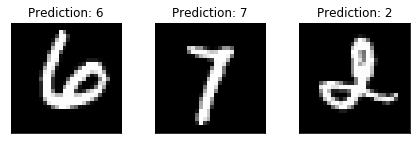

In [99]:
examples = enumerate(data_loader_test)
batch_idx, (example_data, example_targets) = next(examples)

with torch.no_grad():
    output = net(example_data[0:3])
    
fig = plt.figure()
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Prediction: {}".format(
        output.data.max(1, keepdim=True)[1][i].item()))
    plt.xticks([])
    plt.yticks([])